# Assignment #3

Team: <br>
LASRI Mouad 2021021597 <br>
GEMEDA Metasebia 2020010593

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.set_printoptions(edgeitems=2)
torch.manual_seed(42)

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import collections
import seaborn as sns
%matplotlib inline

In [3]:
from datetime import datetime as dt
import scipy as sc
import random

In [4]:
def makeData(N=256, numimg=2, M=8, numfilt=3, seed=42):
    np.random.seed(seed)
    I = np.random.rand(N, N, numimg)
    F = np.random.rand(M, M, numfilt)
    O = np.zeros((N, N, numimg, numfilt))
    return I, F, O

In [5]:
image_data, filter_data, output_data = makeData() 

In [6]:
def c2d(I,F,O):
    for im in range(len(I[0,0])):
        for fi in range(len(F[0,0])):
            img = I[:,:,im]
            fil = F[:,:,fi]
            O[:,:,im,fi]=sc.signal.convolve2d(img,fil,mode='same', boundary='fill', fillvalue=0)
    return O

In [7]:
def c2dfft(I,F,O):
    for im in range(len(I[0,0])):
        for fi in range(len(F[0,0])):
            img = I[:,:,im]
            fil = F[:,:,fi]
            O[:,:,im,fi]=sc.signal.fftconvolve(img,fil,mode='same')
    return O

In [8]:
st1 =  dt.timestamp(dt.now())
O1 = c2d(image_data, filter_data, output_data)
#et1= dt.time()
elapsed_time1 =  dt.timestamp(dt.now())- st1
print('Execution time:', elapsed_time1, 'seconds')

Execution time: 0.23689007759094238 seconds


In [9]:
st2 = dt.timestamp(dt.now())
O2 = c2dfft(image_data, filter_data, output_data)
#et2= dt.time() 
elapsed_time2 = dt.timestamp(dt.now())- st2
print('Execution time:', elapsed_time2, 'seconds')

Execution time: 0.04198598861694336 seconds


To the see the evolution of execution time as the

In [10]:
elapsed_time_conv = np.zeros([30,1])
elapsed_time_fft = np.zeros([30,1])
for i in range(30):
    seed_int =random.randint(0, 1000) # creating random seed values for the  different datasets
    image_data, filter_data, output_data = makeData(N=256, numimg=2, M=1+i, numfilt=3, seed=seed_int) # M--> filter size from 1 to 20
    
    
    #finding execution time for function c2d
    
    st1 =  dt.timestamp(dt.now()) # using datetime's timestam function to create starting point of execution
    O1 = c2d(image_data, filter_data, output_data)
    elapsed_time_conv[i] =  dt.timestamp(dt.now())- st1 # duration of execution
    
    
    #finding execution time for function c2dfft
    st2 =  dt.timestamp(dt.now())
    O2 = c2dfft(image_data, filter_data, output_data)
    elapsed_time_fft[i] =  dt.timestamp(dt.now())- st2    

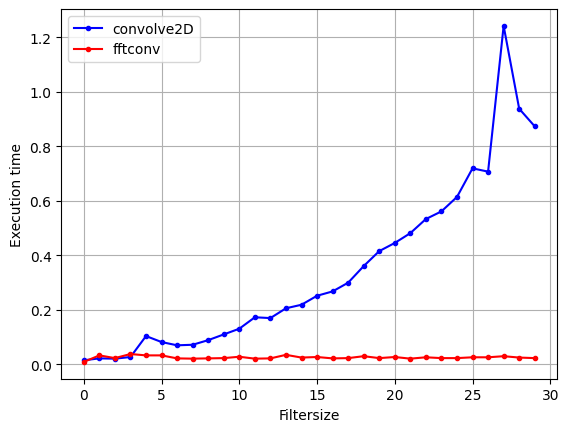

In [11]:
plt.plot(elapsed_time_conv,'b.-')
plt.plot(elapsed_time_fft,'r.-')
plt.xlabel('Filtersize')
plt.ylabel('Execution time')
plt.legend(['convolve2D', 'fftconv'])
plt.grid()


Repeating 20 times for confidence

In [12]:
elapsed_time_conv = np.zeros([30,20])
elapsed_time_fft = np.zeros([30,20])
elapsed_time_conv_mean = np.zeros([30,1])
elapsed_time_conv_std = np.zeros([30,1])
elapsed_time_fft_mean = np.zeros([30,1])
elapsed_time_fft_std = np.zeros([30,1]) 
for m in range (30): # itering to see the effect of increasing the imentionality of filter M
    for i in range(20): # to iter 20 times for confidence over execution time
        seed_int =random.randint(0, 1000) # creating random seed values for 20 different datasets
    
        image_data, filter_data, output_data = makeData(N=256, numimg=2, M=m+1, numfilt=3, seed=seed_int)# M--> filter size from 1 to 20


        #finding execution time for function c2d

        st1 =  dt.timestamp(dt.now()) # using datetime's timestam function to create starting point of execution
        O1 = c2d(image_data, filter_data, output_data)
        elapsed_time_conv[m, i] =  dt.timestamp(dt.now())- st1 # duration of execution
        

        #finding execution time for function c2dfft
        st2 =  dt.timestamp(dt.now())
        O2 = c2dfft(image_data, filter_data, output_data)
        elapsed_time_fft[m ,i ] =  dt.timestamp(dt.now())- st2
        
    #Doing statistics to perfom shaded(Confidence Interval)-based graphing of the effect of dimention of filter for both functions  
    elapsed_time_conv_mean[m] = np.mean(elapsed_time_conv[m])  #collecting the mean for the 20 differet
    elapsed_time_conv_std[m] = np.std(elapsed_time_conv[m]) #standard deviation  
    elapsed_time_fft_mean[m] = np.mean(elapsed_time_fft[m])  #collecting the mean for the 20 differet
    elapsed_time_fft_std[m] = np.std(elapsed_time_fft[m]) #standard deviation 

In [13]:
elapsed_time_conv_mean[:, 0].shape

(30,)

In [14]:
elapsed_time_conv_std.shape

(30, 1)

Since random seed assignment, we can use confidence shaded plot for the above result

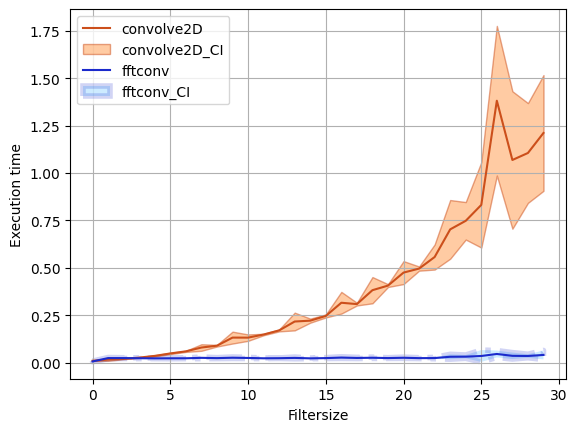

In [15]:
plt.plot(elapsed_time_conv_mean, color='#CC4F1B')
plt.fill_between(np.arange(0, 30), elapsed_time_conv_mean[:, 0]-elapsed_time_conv_std[:, 0], elapsed_time_conv_mean[:, 0]+elapsed_time_conv_std[:, 0], alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.plot(elapsed_time_fft_mean, color='#1B2ACC')
plt.fill_between(np.arange(0, 30), elapsed_time_fft_mean[:, 0]-elapsed_time_fft_std[:, 0], elapsed_time_fft_mean[:, 0]+elapsed_time_fft_std[:, 0] , alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
    linewidth=4, linestyle='dashdot', antialiased=True)
plt.xlabel('Filtersize')
plt.ylabel('Execution time')
plt.legend(['convolve2D', 'convolve2D_CI' , 'fftconv','fftconv_CI' ])
plt.grid()

From the above graph, it is again visible that the fft is the faster convolution function when filter size increases. The FFT has very little deviation in execution time compared to the convolve2d function

It seems that the fft convolve becomes faster than the convolve2D function after M=4. The convolve 2D's execution time increases in somhow exponential manner with filter size. But the FFT convolution execution time is unaffected maorely by the filter size

In [16]:
for i in range(30):
    print('Average Execution time for convolve2D with filter size M=', i+1, 'is',elapsed_time_conv_mean[i] )

Average Execution time for convolve2D with filter size M= 1 is [0.00960084]
Average Execution time for convolve2D with filter size M= 2 is [0.01579094]
Average Execution time for convolve2D with filter size M= 3 is [0.01935717]
Average Execution time for convolve2D with filter size M= 4 is [0.02633425]
Average Execution time for convolve2D with filter size M= 5 is [0.03536161]
Average Execution time for convolve2D with filter size M= 6 is [0.04824654]
Average Execution time for convolve2D with filter size M= 7 is [0.05929995]
Average Execution time for convolve2D with filter size M= 8 is [0.07951502]
Average Execution time for convolve2D with filter size M= 9 is [0.08909963]
Average Execution time for convolve2D with filter size M= 10 is [0.13187611]
Average Execution time for convolve2D with filter size M= 11 is [0.13167334]
Average Execution time for convolve2D with filter size M= 12 is [0.14806541]
Average Execution time for convolve2D with filter size M= 13 is [0.16976354]
Average 

In [17]:
for i in range(30):
    print('Average Execution time for fft based convolution with filter size M=', i+1, 'is',elapsed_time_fft_mean[i] )

Average Execution time for fft based convolution with filter size M= 1 is [0.00609224]
Average Execution time for fft based convolution with filter size M= 2 is [0.0237967]
Average Execution time for fft based convolution with filter size M= 3 is [0.02381378]
Average Execution time for fft based convolution with filter size M= 4 is [0.0230913]
Average Execution time for fft based convolution with filter size M= 5 is [0.02234995]
Average Execution time for fft based convolution with filter size M= 6 is [0.02265056]
Average Execution time for fft based convolution with filter size M= 7 is [0.02279116]
Average Execution time for fft based convolution with filter size M= 8 is [0.02509046]
Average Execution time for fft based convolution with filter size M= 9 is [0.02358741]
Average Execution time for fft based convolution with filter size M= 10 is [0.025737]
Average Execution time for fft based convolution with filter size M= 11 is [0.02449138]
Average Execution time for fft based convolut

## Ordering of Arrays

To find which ordering of the arrays is faster, we define a new 'makeData' function

In [18]:
def makeData2(N=256, numimg=2, M=8, numfilt=3, seed=42):
    np.random.seed(seed)
    I = np.random.rand(numimg, N, N)
    F = np.random.rand(numfilt, M, M)
    O = np.zeros(( numimg, numfilt, N, N,))
    return I, F, O

And corresponding function of convolution

In [19]:
def c2d_new(I,F,O):
    for im in range(len(I)):
        for fi in range(len(F)):
            img = I[im, :,:]
            fil = F[fi, :,:]
            O[im,fi,  :,:]=sc.signal.convolve2d(img,fil,mode='same', boundary='fill', fillvalue=0)
    return O

In [20]:
def c2dfft_new(I,F,O):
    for im in range(len(I)):
        for fi in range(len(F)):
            img = I[im, :,:]
            fil = F[fi, :,:]
            O[im,fi, :,:]=sc.signal.fftconvolve(img,fil,mode='same')
    return O

comparison of the effect of array arrangement in  increasing filter size for conv2d

In [21]:
elapsed_time_conv1 = np.zeros([30,1])
elapsed_time_conv2 = np.zeros([30,1])
for i in range(30): 
    #no random seed number, we will use that for when we collect 20 different samples for each filter size
    
    image_data, filter_data, output_data = makeData(N=256, numimg=2, M=1+i, numfilt=3, seed=42) #data with orginal 'makedata' 
    
    image_data2, filter_data2, output_data2 = makeData2(N=256, numimg=2, M=1+i, numfilt=3, seed=42) #data with new  'makedata' and same seed value
    
    
    #finding execution time for function c2d with orginal array arrangement
    
    st1 =  dt.timestamp(dt.now()) # using datetime's timestam function to create starting point of execution
    O1 = c2d(image_data, filter_data, output_data)
    elapsed_time_conv1[i] =  dt.timestamp(dt.now())- st1 # duration of execution
    
    
    #finding execution time for function c2d with new array arrangement
    st2 =  dt.timestamp(dt.now())
    O2 = c2d_new(image_data2, filter_data2, output_data2)
    elapsed_time_conv2[i] =  dt.timestamp(dt.now())- st2    

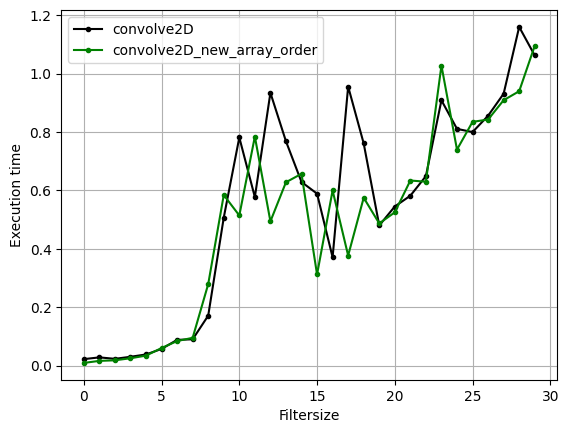

In [22]:
plt.plot(elapsed_time_conv1,'k.-')
plt.plot(elapsed_time_conv2,'g.-')
plt.xlabel('Filtersize')
plt.ylabel('Execution time')
plt.legend(['convolve2D', 'convolve2D_new_array_order'])
plt.grid()


Comparison of the effect of array arrangement in  increasing filter size for fftconv

In [23]:
elapsed_time_fft1 = np.zeros([30,1])
elapsed_time_fft2 = np.zeros([30,1])
for i in range(30):
    #no random seed number, we will use that for when we collect 20 different samples for each filter size
    
    image_data, filter_data, output_data = makeData(N=256, numimg=2, M=1+i, numfilt=3, seed=42) #data with orginal 'makedata' 
    
    image_data2, filter_data2, output_data2 = makeData2(N=256, numimg=2, M=1+i, numfilt=3, seed=42) #data with new  'makedata' and same seed value
    
    
    
    #finding execution time for function c2dfft with orginal array arrangement
    
    st1 =  dt.timestamp(dt.now()) # using datetime's timestam function to create starting point of execution
    O1 = c2dfft(image_data, filter_data, output_data)
    elapsed_time_fft1[i] =  dt.timestamp(dt.now())- st1 # duration of execution
    
    
    #finding execution time for function c2dfft with new array arrangement
    st2 =  dt.timestamp(dt.now())
    O2 = c2dfft_new(image_data2, filter_data2, output_data2)
    elapsed_time_fft2[i] =  dt.timestamp(dt.now())- st2   

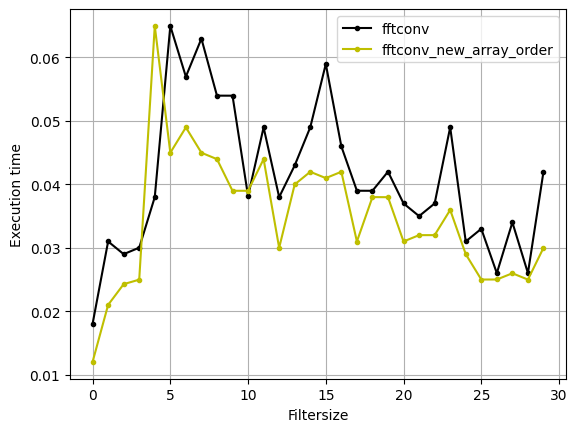

In [24]:
plt.plot(elapsed_time_fft1,'k.-')
plt.plot(elapsed_time_fft2,'y.-')
plt.xlabel('Filtersize')
plt.ylabel('Execution time')
plt.legend(['fftconv', 'fftconv_new_array_order'])
plt.grid()


It seems the ordering of the arrays does affects execution time to an extent. If we take a look at the FFt graph for both the new array arrangement and for theold one, then we will notice that the new array arrangemnt is slightly faster.

After taking 20 different trials for confidence

In [25]:
elapsed_time_conv2 = np.zeros([30,20])
elapsed_time_fft2 = np.zeros([30,20])
elapsed_time_conv_mean2 = np.zeros([30,1])
elapsed_time_conv_std2 = np.zeros([30,1])
elapsed_time_fft_mean2 = np.zeros([30,1])
elapsed_time_fft_std2 = np.zeros([30,1]) 
for m in range (30): # itering to see the effect of increasing the imentionality of filter M
    for i in range(20): # to iter 20 times for confidence over execution time
        seed_int =random.randint(0, 1000) # creating random seed values for 20 different datasets
    
        image_data2, filter_data2, output_data2 = makeData2(N=256, numimg=2, M=m+1, numfilt=3, seed=seed_int)#new make data


        #finding execution time for function c2d with new array arrangement

        st1 =  dt.timestamp(dt.now()) # using datetime's timestam function to create starting point of execution
        O1 = c2d_new(image_data2, filter_data2, output_data2)  # new conv function
        elapsed_time_conv2[m, i] =  dt.timestamp(dt.now())- st1 # duration of execution
        

        #finding execution time for function c2dfft with new array arrangement
        st2 =  dt.timestamp(dt.now())
        O2 = c2dfft_new(image_data2, filter_data2, output_data2)   #new fft function
        elapsed_time_fft2[m ,i ] =  dt.timestamp(dt.now())- st2
        
    #Doing statistics to perfom shaded(Confidence Interval)-based graphing of the effect of dimention of filter for both functions  
    elapsed_time_conv_mean2[m] = np.mean(elapsed_time_conv2[m])  #collecting the mean for the 20 differet
    elapsed_time_conv_std2[m] = np.std(elapsed_time_conv2[m]) #standard deviation  
    elapsed_time_fft_mean2[m] = np.mean(elapsed_time_fft2[m])  #collecting the mean for the 20 differet
    elapsed_time_fft_std2[m] = np.std(elapsed_time_fft2[m]) #standard deviation 

To compare the 2 different array arranegement for the 2 function over all filter sizes

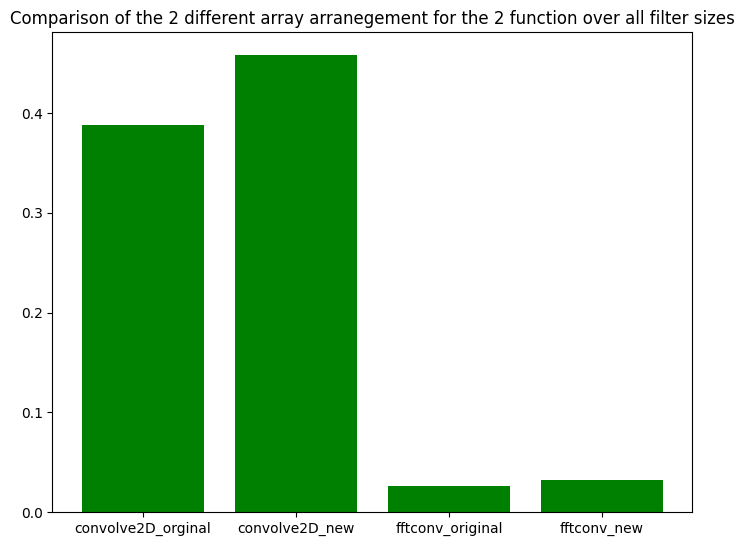

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
convolver_array_arrangemnt= ['convolve2D_orginal', 'convolve2D_new', 'fftconv_original', 'fftconv_new']
averages = [np.mean(elapsed_time_conv_mean),np.mean(elapsed_time_conv_mean2),np.mean(elapsed_time_fft_mean),np.mean(elapsed_time_fft_mean2)]
ax.bar(convolver_array_arrangemnt, averages, color = 'g')
ax.set_title('Comparison of the 2 different array arranegement for the 2 function over all filter sizes')
plt.show()

As shown by the averages, the new arrnagemnet has slower average excecution time for both convolution methods

To compare the 2 different array arranegement for the 2 function at different filter sizes

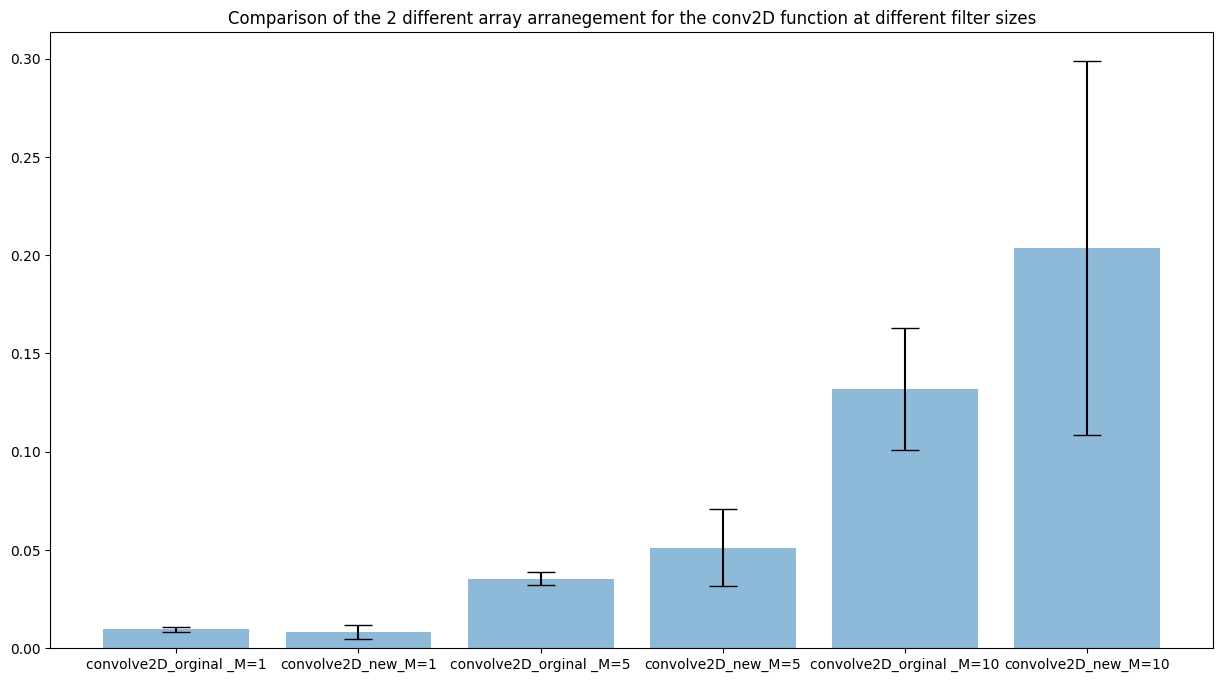

In [33]:
fig, ax = plt.subplots(figsize=(15,8))
convolver_array_arrangemnt= ['convolve2D_orginal _M=1', 'convolve2D_new_M=1', 'convolve2D_orginal _M=5', 'convolve2D_new_M=5', 'convolve2D_orginal _M=10', 'convolve2D_new_M=10']
x_pos = np.arange(len(convolver_array_arrangemnt))
averages = [elapsed_time_conv_mean[0].mean(), elapsed_time_conv_mean2[0].mean(), elapsed_time_conv_mean[4].mean(), elapsed_time_conv_mean2[4].mean(), elapsed_time_conv_mean[9].mean(), elapsed_time_conv_mean2[9].mean()]
error = [elapsed_time_conv_std[0].mean(), elapsed_time_conv_std2[0].mean(), elapsed_time_conv_std[4].mean(), elapsed_time_conv_std2[4].mean(), elapsed_time_conv_std[9].mean(), elapsed_time_conv_std2[9].mean()]
ax.bar(x_pos, averages, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(convolver_array_arrangemnt)
ax.set_title('Comparison of the 2 different array arranegement for the conv2D function at different filter sizes')
plt.show()

At M= 1, the new arrangement doesnt have a difference, but as the firler size increases, the new array arrangement has slower execution time

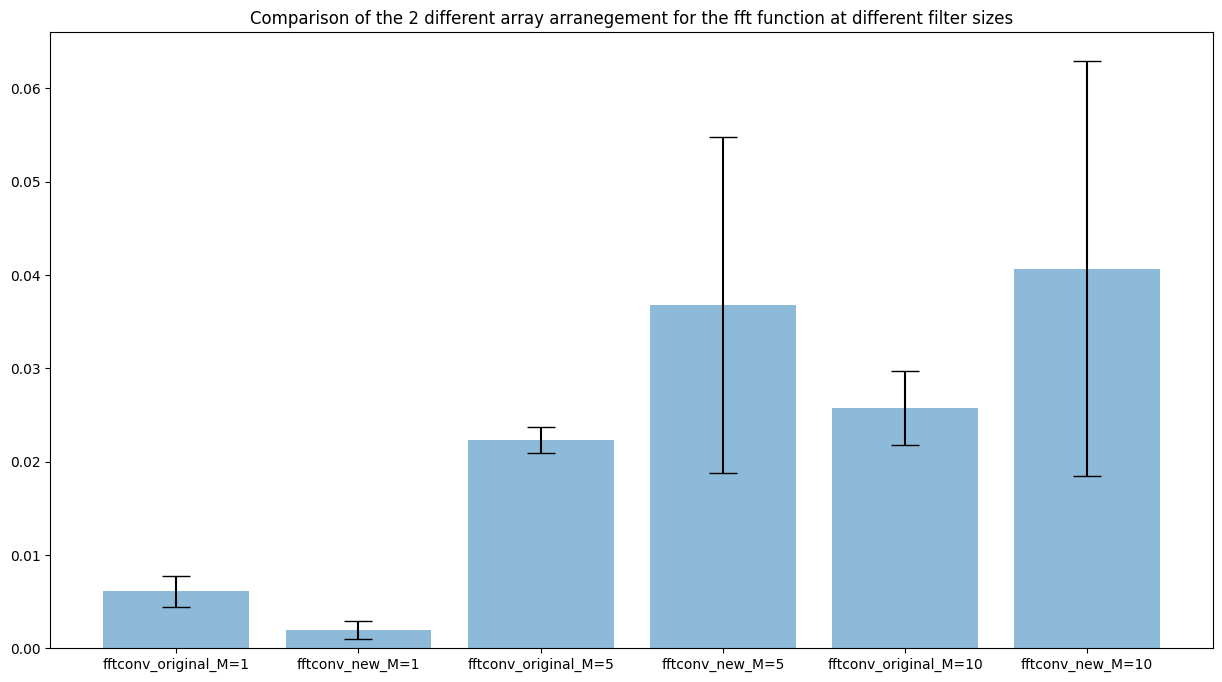

In [35]:
fig, ax = plt.subplots(figsize=(15,8))
convolver_array_arrangemnt= [ 'fftconv_original_M=1', 'fftconv_new_M=1', 'fftconv_original_M=5', 'fftconv_new_M=5', 'fftconv_original_M=10', 'fftconv_new_M=10']
x_pos = np.arange(len(convolver_array_arrangemnt))
averages = [ elapsed_time_fft_mean[0].mean(), elapsed_time_fft_mean2[0].mean(), elapsed_time_fft_mean[4].mean(), elapsed_time_fft_mean2[4].mean(), elapsed_time_fft_mean[9].mean(), elapsed_time_fft_mean2[9].mean()]
error = [ elapsed_time_fft_std[0].mean(), elapsed_time_fft_std2[0].mean(), elapsed_time_fft_std[4].mean(), elapsed_time_fft_std2[4].mean(), elapsed_time_fft_std[9].mean(), elapsed_time_fft_std2[9].mean()]
ax.bar(x_pos, averages, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(convolver_array_arrangemnt)
ax.set_title('Comparison of the 2 different array arranegement for the fft function at different filter sizes')
plt.show()

As small filter size, the new arrangement is faster, but as filter size gets bigger, the older arrnagement is found to be faster